In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#load data
df = pd.read_csv("resumes_with_labels.csv")
#only keep text and label for this
df = df[["text", "got_internship"]].dropna()

#train test split
X_train, X_test, y_train, y_test = train_test_split(
    df["text"], df["got_internship"], test_size = 0.2, random_state = 42, stratify = df["got_internship"]
)

#vectorize text
vectorizer = TfidfVectorizer(stop_words = "english", sublinear_tf = True, max_features = 5000, ngram_range = (1, 2), min_df = 3)
X_train_vector = vectorizer.fit_transform(X_train)
X_test_vector = vectorizer.transform(X_test)




In [2]:
display(X_train_vector)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 18360 stored elements and shape (129, 2078)>

In [3]:
display(X_test_vector)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4276 stored elements and shape (33, 2078)>

accuracy:  0.6060606060606061
f1:  0.7111111111111111

classification report:
               precision    recall  f1-score   support

           0       0.50      0.31      0.38        13
           1       0.64      0.80      0.71        20

    accuracy                           0.61        33
   macro avg       0.57      0.55      0.55        33
weighted avg       0.58      0.61      0.58        33



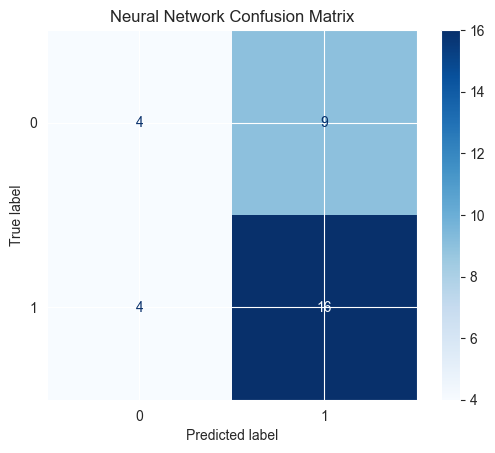

In [4]:
clf = MLPClassifier(
    hidden_layer_sizes=(128, 64),
    activation="relu",
    solver="adam",
    max_iter=200,
    random_state=42
)

clf.fit(X_train_vector, y_train)
y_prediction = clf.predict(X_test_vector)

print("accuracy: ", accuracy_score(y_test, y_prediction))
print("f1: ", f1_score(y_test, y_prediction))
print("\nclassification report:\n", classification_report(y_test, y_prediction))

ConfusionMatrixDisplay.from_predictions(y_test, y_prediction, cmap="Blues", values_format="d")
plt.title("Neural Network Confusion Matrix")
plt.show()

In [5]:
X_train_vector.shape

(129, 2078)

Neural Network

In [ ]:
import keras
import tensorflow as tf

nn_model = keras.Sequential([
    keras.layers.Input(shape = (X_train.shape[1],)),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])
nn_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10) # early stopping callback, tracking val_loss

In [ ]:
# Train the NN model
start_time = time.time()
nn_model.fit(X_train, y_train, epochs = 100, batch_size = 64, validation_split = 0.10, callbacks=[es_callback])
end_time = time.time()
nn_train_time = end_time - start_time
print(f"Training time: {end_time - start_time} seconds")

In [ ]:
# Make predictions on the test data
pred_nn = nn_model.predict(X_test)
# Convert probabilities to binary predictions (neural network returns a probability)
pred_nn = (pred_nn > 0.5).astype(int)
# Evaluate the model using Accuracy, Precision, Recall, and F1 Score
print('Evaluating Neural Network Model \n')

accuracy_nn = accuracy_score(y_test, pred_nn)
display(f"Model accuracy: {accuracy_nn}")

precision_nn = precision_score(y_test, pred_nn)
display(f"Precision: {precision_nn:.3f}")

recall_nn = recall_score(y_test, pred_nn, average="weighted")
display(f"Recall: {recall_nn:.4f}")

f1_nn = f1_score(y_test, pred_nn, average="weighted")
display(f"f1: {f1_nn:.4f}")

# Confusion Matrix for neural network RFE
conf_matrix = confusion_matrix(y_test, pred_nn)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Neural Network")
plt.show()

print(conf_matrix)

# Generate classification report
print(classification_report(y_test, pred_nn))